In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

size = 14
legendsize = 12

# QAOA

In [2]:
df = pd.read_csv('../res_qaoa.csv', sep=',')
df['num_qubits'] = df['num_qubits'].astype(int)
df['num_qubits2'] = df['num_qubits'].astype(int)
df.replace(to_replace=["None"], value=0, inplace=True)
df.set_index('num_qubits', inplace=True)
df

,sample_probability,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_proposed,cx_count_baseline_O0,cx_count_baseline_O1,cx_count_baseline_O2,cx_count_baseline_O3,cx_count_proposed,considered_following_qubits,num_qubits2
num_qubits,,,,,,,,,,,,,
5,0.3,0.101593,0.023412,0.020406,0.029661,0.001274,27,12,12,12,21,1,5
5,0.3,0.046563,0.051755,0.187657,0.154216,0.008151,51,41,41,41,76,1000,5
5,0.7,0.077198,0.046142,0.038020,0.068754,0.000008,39,33,33,33,33,1,5
5,0.7,0.075026,0.039537,0.035897,0.258350,0.002888,108,84,84,84,94,1000,5
10,0.3,0.112183,0.416470,1.267485,1.661550,0.002110,90,30,30,30,32,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.7,34.961067,4.178266,9.803022,73.057018,0.357467,128145,70666,67671,64039,61208,1000,95
100,0.3,0.133621,0.771956,73.356441,382.962219,0.036504,372,156,156,156,176,1,100
100,0.3,24.799653,2.869301,6.920234,40.153097,1.242339,78132,48047,46760,46398,61929,1000,100


In [3]:
def label_encoding (row):
    if row['considered_following_qubits'] == 1 :
        return 'Only Direct Neighbor'
    elif row['considered_following_qubits'] == 1000 :
        return "All Neighbors"
df["Encoding Prediction"] = df.apply(lambda row: label_encoding(row), axis=1)
df

,sample_probability,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_proposed,cx_count_baseline_O0,cx_count_baseline_O1,cx_count_baseline_O2,cx_count_baseline_O3,cx_count_proposed,considered_following_qubits,num_qubits2,Encoding Prediction
num_qubits,,,,,,,,,,,,,,
5,0.3,0.101593,0.023412,0.020406,0.029661,0.001274,27,12,12,12,21,1,5,Only Direct Neighbor
5,0.3,0.046563,0.051755,0.187657,0.154216,0.008151,51,41,41,41,76,1000,5,All Neighbors
5,0.7,0.077198,0.046142,0.038020,0.068754,0.000008,39,33,33,33,33,1,5,Only Direct Neighbor
5,0.7,0.075026,0.039537,0.035897,0.258350,0.002888,108,84,84,84,94,1000,5,All Neighbors
10,0.3,0.112183,0.416470,1.267485,1.661550,0.002110,90,30,30,30,32,1,10,Only Direct Neighbor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.7,34.961067,4.178266,9.803022,73.057018,0.357467,128145,70666,67671,64039,61208,1000,95,All Neighbors
100,0.3,0.133621,0.771956,73.356441,382.962219,0.036504,372,156,156,156,176,1,100,Only Direct Neighbor
100,0.3,24.799653,2.869301,6.920234,40.153097,1.242339,78132,48047,46760,46398,61929,1000,100,All Neighbors


In [4]:
df['time_proposed'] = df['time_proposed'].astype(float)
df['time_baseline_O0'] = df['time_baseline_O0'].astype(float)
df['time_baseline_O1'] = df['time_baseline_O1'].astype(float)
df['time_baseline_O2'] = df['time_baseline_O2'].astype(float)
df['time_baseline_O3'] = df['time_baseline_O3'].astype(float)
df['cx_count_proposed'] = df['cx_count_proposed'].astype(int)
df['cx_count_O0'] = df['cx_count_baseline_O0'].astype(int)
df['cx_count_O1'] = df['cx_count_baseline_O1'].astype(int)
df['cx_count_O2'] = df['cx_count_baseline_O2'].astype(int)
df['cx_count_O3'] = df['cx_count_baseline_O3'].astype(int)

df["time_ratio_O0"] = df["time_proposed"]/df["time_baseline_O0"]
df["time_ratio_O1"] = df["time_proposed"]/df["time_baseline_O1"]
df["time_ratio_O2"] = df["time_proposed"]/df["time_baseline_O2"]
df["time_ratio_O3"] = df["time_proposed"]/df["time_baseline_O3"]
df["cx_ratio_O0"] = df['cx_count_proposed'].divide(df['cx_count_O0'])
df["cx_ratio_O3"] = df['cx_count_proposed'].divide(df['cx_count_O3'])
df

,sample_probability,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_proposed,cx_count_baseline_O0,cx_count_baseline_O1,cx_count_baseline_O2,cx_count_baseline_O3,...,cx_count_O0,cx_count_O1,cx_count_O2,cx_count_O3,time_ratio_O0,time_ratio_O1,time_ratio_O2,time_ratio_O3,cx_ratio_O0,cx_ratio_O3
num_qubits,,,,,,,,,,,,,,,,,,,,,
5,0.3,0.101593,0.023412,0.020406,0.029661,0.001274,27,12,12,12,...,27,12,12,12,0.012541,0.054421,0.062438,0.042956,0.777778,1.750000
5,0.3,0.046563,0.051755,0.187657,0.154216,0.008151,51,41,41,41,...,51,41,41,41,0.175054,0.157493,0.043436,0.052855,1.490196,1.853659
5,0.7,0.077198,0.046142,0.038020,0.068754,0.000008,39,33,33,33,...,39,33,33,33,0.000102,0.000171,0.000207,0.000114,0.846154,1.000000
5,0.7,0.075026,0.039537,0.035897,0.258350,0.002888,108,84,84,84,...,108,84,84,84,0.038493,0.073045,0.080451,0.011178,0.870370,1.119048
10,0.3,0.112183,0.416470,1.267485,1.661550,0.002110,90,30,30,30,...,90,30,30,30,0.018809,0.005066,0.001665,0.001270,0.355556,1.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.7,34.961067,4.178266,9.803022,73.057018,0.357467,128145,70666,67671,64039,...,128145,70666,67671,64039,0.010225,0.085554,0.036465,0.004893,0.477646,0.955793
100,0.3,0.133621,0.771956,73.356441,382.962219,0.036504,372,156,156,156,...,372,156,156,156,0.273191,0.047288,0.000498,0.000095,0.473118,1.128205
100,0.3,24.799653,2.869301,6.920234,40.153097,1.242339,78132,48047,46760,46398,...,78132,48047,46760,46398,0.050095,0.432976,0.179523,0.030940,0.792620,1.334734


In [5]:
df[df.index<100].cx_ratio_O3.describe()

count    76.000000
mean      1.174163
std       0.300600
min       0.822015
25%       1.000000
50%       1.084848
75%       1.246756
max       2.729167
Name: cx_ratio_O3, dtype: float64

In [6]:
x = df#[df.considered_following_qubits==1]
x = x[x.index%1==0][[
    "Encoding Prediction",
    "sample_probability",
    "time_proposed",
    "time_baseline_O0",
    "time_baseline_O1",
    "time_baseline_O2",
    "time_baseline_O3",
    "time_ratio_O0", 
    "time_ratio_O3", 
    "cx_count_proposed",
    "cx_ratio_O0",
    "cx_ratio_O3",
]
]

x["time_baseline_O0"] = x["time_baseline_O0"].round(4)
x["time_baseline_O3"] = x["time_baseline_O3"].round(4)
x["time_proposed"] = x["time_proposed"].round(4)
x["cx_ratio_O0"] = x["cx_ratio_O0"].round(2)
x["cx_ratio_O3"] = x["cx_ratio_O3"].round(2)
x

,Encoding Prediction,sample_probability,time_proposed,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_ratio_O0,time_ratio_O3,cx_count_proposed,cx_ratio_O0,cx_ratio_O3
num_qubits,,,,,,,,,,,,
5,Only Direct Neighbor,0.3,0.0013,0.1016,0.023412,0.020406,0.0297,0.012541,0.042956,21,0.78,1.75
5,All Neighbors,0.3,0.0082,0.0466,0.051755,0.187657,0.1542,0.175054,0.052855,76,1.49,1.85
5,Only Direct Neighbor,0.7,0.0000,0.0772,0.046142,0.038020,0.0688,0.000102,0.000114,33,0.85,1.00
5,All Neighbors,0.7,0.0029,0.0750,0.039537,0.035897,0.2584,0.038493,0.011178,94,0.87,1.12
10,Only Direct Neighbor,0.3,0.0021,0.1122,0.416470,1.267485,1.6616,0.018809,0.001270,32,0.36,1.07
...,...,...,...,...,...,...,...,...,...,...,...,...
95,All Neighbors,0.7,0.3575,34.9611,4.178266,9.803022,73.0570,0.010225,0.004893,61208,0.48,0.96
100,Only Direct Neighbor,0.3,0.0365,0.1336,0.771956,73.356441,382.9622,0.273191,0.000095,176,0.47,1.13
100,All Neighbors,0.3,1.2423,24.7997,2.869301,6.920234,40.1531,0.050095,0.030940,61929,0.79,1.33


In [7]:
x["Benchmark"] = "Qubits=" + x.index.astype(str) + ", p=" + x.sample_probability.astype(str)

In [8]:
x = x.sort_values(["Encoding Prediction","sample_probability", "num_qubits"])
x.set_index('Benchmark', inplace=True)
x = x.drop('sample_probability', axis=1)
x

,Encoding Prediction,time_proposed,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_ratio_O0,time_ratio_O3,cx_count_proposed,cx_ratio_O0,cx_ratio_O3
Benchmark,,,,,,,,,,,
"Qubits=5, p=0.3",All Neighbors,0.0082,0.0466,0.051755,0.187657,0.1542,0.175054,0.052855,76,1.49,1.85
"Qubits=10, p=0.3",All Neighbors,0.0171,0.3393,0.091197,0.211620,0.5147,0.050339,0.033187,425,1.07,2.04
"Qubits=15, p=0.3",All Neighbors,0.0431,0.5945,0.188541,0.238517,1.0858,0.072438,0.039663,1179,1.52,2.73
"Qubits=20, p=0.3",All Neighbors,0.0699,0.9419,0.266356,0.263699,1.5291,0.074251,0.045738,1815,1.07,1.75
"Qubits=25, p=0.3",All Neighbors,0.1934,0.9516,0.232354,0.740324,3.3236,0.203197,0.058180,3312,1.07,1.70
...,...,...,...,...,...,...,...,...,...,...,...
"Qubits=80, p=0.7",Only Direct Neighbor,0.0111,0.4328,6.175208,914.087712,4829.1562,0.025538,0.000002,348,0.33,1.02
"Qubits=85, p=0.7",Only Direct Neighbor,0.0105,0.4252,22.447226,950.236936,5188.7334,0.024752,0.000002,380,0.35,1.04
"Qubits=90, p=0.7",Only Direct Neighbor,0.0112,0.4353,6.472379,925.888490,5120.4726,0.025823,0.000002,404,0.37,1.07


In [9]:
x.time_ratio_O0.describe()

count    80.000000
mean      0.077536
std       0.128896
min       0.000102
25%       0.013569
50%       0.025947
75%       0.074233
max       0.737939
Name: time_ratio_O0, dtype: float64

In [10]:
x.time_ratio_O3.describe()

count    80.000000
mean      0.011177
std       0.015503
min       0.000002
25%       0.000041
50%       0.004985
75%       0.021324
max       0.058180
Name: time_ratio_O3, dtype: float64

In [11]:
x.cx_ratio_O0.describe()

count    80.000000
mean      0.563250
std       0.244182
min       0.240000
25%       0.405000
50%       0.485000
75%       0.700000
max       1.520000
Name: cx_ratio_O0, dtype: float64

In [12]:
x.cx_ratio_O3.describe()

count    80.000000
mean      1.170625
std       0.295036
min       0.820000
25%       1.000000
50%       1.085000
75%       1.250000
max       2.730000
Name: cx_ratio_O3, dtype: float64

In [13]:
x = x.rename(columns={"time_ratio_with_opt_O0": "Time Ratio O0", 
                      "time_ratio_with_opt_O3": "Time Ratio O3", 
                      "cx_count_baseline_O0": "CX Count Baseline O0",
                      "cx_count_baseline_O3": "CX Count Baseline O3", 
                      "cx_count_with_opt": "CX Count New Scheme", 
                      "cx_ratio_with_opt_O0": "CX Count Ratio O0", 
                      "cx_ratio_with_opt_O3": "CX Count Ratio O3", 
                      "time_new_scheme_with_opt":"Time New Scheme", 
                      "time_baseline_O0":"Time Baseline O0",
                      "time_baseline_O3":"Time Baseline O3"
                     }
            )
print(x.to_latex())

\begin{tabular}{llrrrrrrrrrr}
\toprule
{} &   Encoding Prediction &  time\_proposed &  Time Baseline O0 &  time\_baseline\_O1 &  time\_baseline\_O2 &  Time Baseline O3 &  time\_ratio\_O0 &  time\_ratio\_O3 &  cx\_count\_proposed &  cx\_ratio\_O0 &  cx\_ratio\_O3 \\
Benchmark         &                       &                &                   &                   &                   &                   &                &                &                    &              &              \\
\midrule
Qubits=5, p=0.3   &         All Neighbors &         0.0082 &            0.0466 &          0.051755 &          0.187657 &            0.1542 &       0.175054 &       0.052855 &                 76 &         1.49 &         1.85 \\
Qubits=10, p=0.3  &         All Neighbors &         0.0171 &            0.3393 &          0.091197 &          0.211620 &            0.5147 &       0.050339 &       0.033187 &                425 &         1.07 &         2.04 \\
Qubits=15, p=0.3  &         All Neighbors & 

/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_39481/2077848468.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(x.to_latex())


# Graph Trial

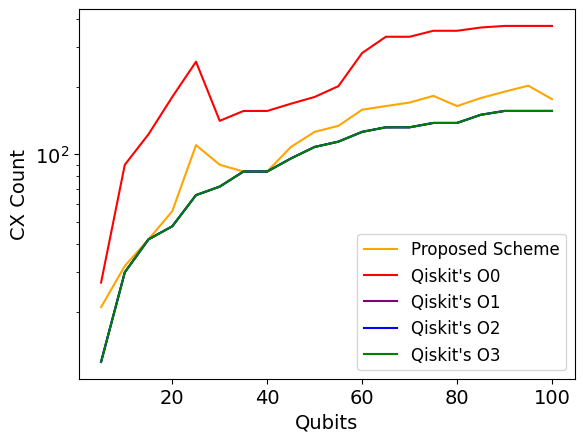

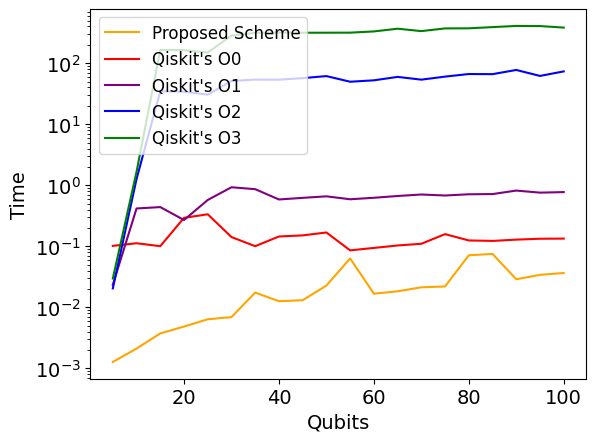

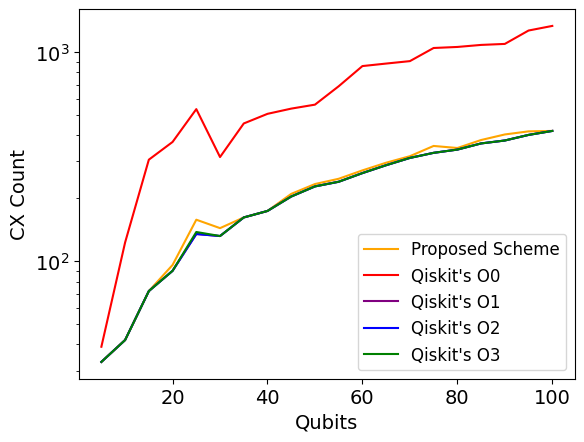

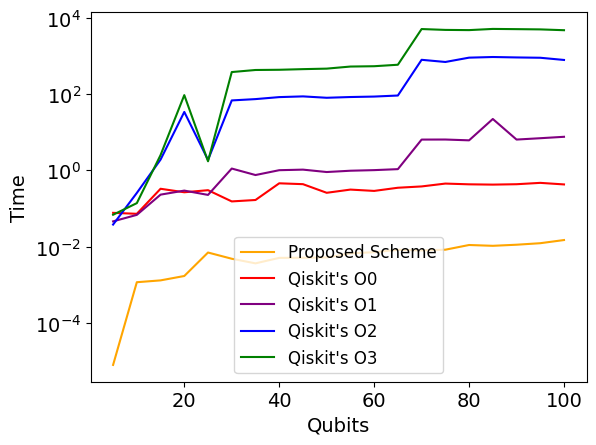

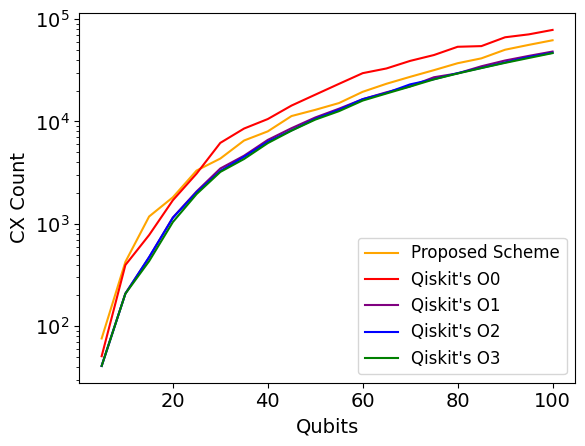

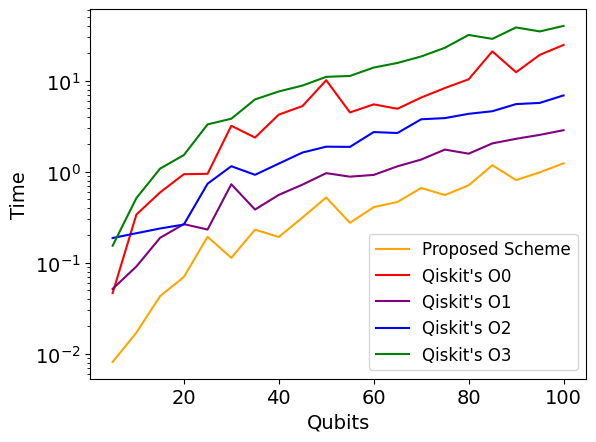

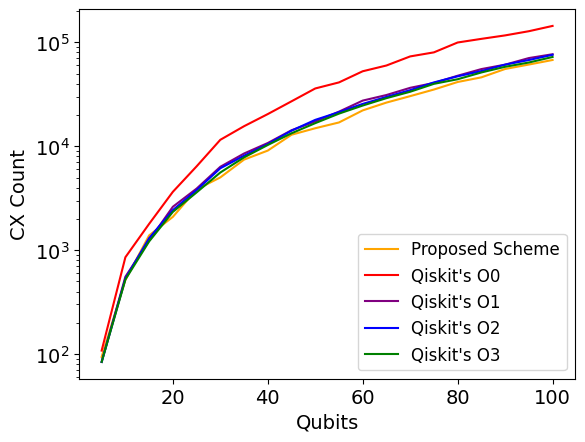

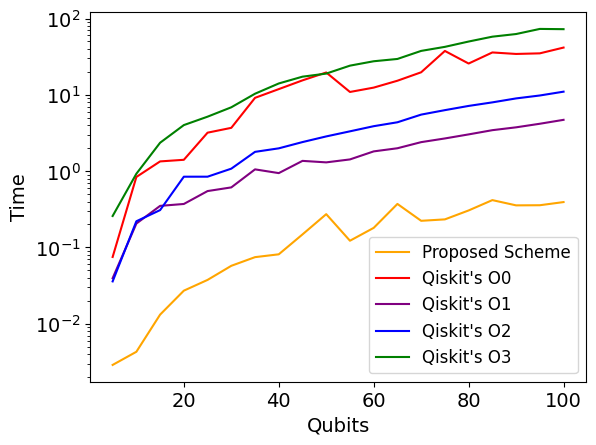

In [14]:
for considered_following_qubits in ["Only Direct Neighbor", "All Neighbors"]:
    for sample_probability in [0.3,0.7]:
        df_new = df[(df.sample_probability==sample_probability) & (df["Encoding Prediction"]==considered_following_qubits)]
        
        ax1 = df_new.plot(x='num_qubits2', y='cx_count_proposed', color='orange', label="Proposed Scheme")   
        ax1.tick_params(which='both', labelsize=size)
        ax2 = df_new.plot( x='num_qubits2', y='cx_count_O0', color='red', ax=ax1, label="Qiskit's O0")
        ax3 = df_new.plot( x='num_qubits2', y='cx_count_O1', color='purple', ax=ax1, label="Qiskit's O1") 
        ax4 = df_new.plot( x='num_qubits2', y='cx_count_O2', color='blue', ax=ax1, label="Qiskit's O2") 
        ax5 = df_new.plot( x='num_qubits2', y='cx_count_O3', color='green', ax=ax1, label="Qiskit's O3") 
        
        plt.xlabel("Qubits", size=size)
        plt.ylabel("CX Count", size=size)
        #plt.xscale("log")
        plt.yscale("log")
        plt.legend(fontsize=legendsize)
        plt.savefig('cx_'+str(considered_following_qubits) + '_'+ str(sample_probability)+'.pdf')
        plt.show()
        
        ax6 = df_new.plot( x='num_qubits2', y='time_proposed', color='orange', label="Proposed Scheme")   
        ax6.tick_params(which='both', labelsize=size)
        ax7 = df_new.plot(x='num_qubits2', y='time_baseline_O0', color='red', ax=ax6, label="Qiskit's O0")
        ax8 = df_new.plot(x='num_qubits2', y='time_baseline_O1', color='purple', ax=ax6, label="Qiskit's O1") 
        ax9 = df_new.plot( x='num_qubits2', y='time_baseline_O2', color='blue', ax=ax6, label="Qiskit's O2") 
        ax10 = df_new.plot( x='num_qubits2', y='time_baseline_O3', color='green', ax=ax6, label="Qiskit's O3") 
        
        plt.xlabel("Qubits", size=size)
        plt.ylabel("Time", size=size)
        #plt.xscale("log")
        plt.yscale("log")
        plt.legend(fontsize=legendsize)
        plt.savefig('time_'+str(considered_following_qubits) + '_'+ str(sample_probability)+'.pdf')
        plt.show()

# Average Value Calculation

In [15]:
import math
def orderOfMagnitude(number):
    return math.floor(math.log(number, 10))

df["order_magnitudes_diff"] = df["time_proposed"].apply(orderOfMagnitude)-df["time_baseline_O3"].apply(orderOfMagnitude)
df["order_magnitudes_diff"].describe()

count    80.000000
mean     -3.087500
std       1.459961
min      -6.000000
25%      -4.000000
50%      -2.500000
75%      -2.000000
max      -1.000000
Name: order_magnitudes_diff, dtype: float64

In [16]:
df["cx_ratio_O3"].describe()

count    80.000000
mean      1.170435
std       0.295346
min       0.822015
25%       1.000000
50%       1.084848
75%       1.246756
max       2.729167
Name: cx_ratio_O3, dtype: float64

# Satellite

In [17]:
df = pd.read_csv('../res_satellite.csv', sep=',')
df['num_qubits'] = df['num_qubits'].astype(int)
df['num_qubits2'] = df['num_qubits'].astype(int)
df.replace(to_replace=["None"], value=0, inplace=True)
df.set_index('num_qubits', inplace=True)
df

,sample_probability,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_proposed,cx_count_baseline_O0,cx_count_baseline_O1,cx_count_baseline_O2,cx_count_baseline_O3,cx_count_proposed,considered_following_qubits,num_qubits2
num_qubits,,,,,,,,,,,,,
5,0.4,0.036168,0.026815,0.021424,0.029704,0.032714,33,18,18,18,27,1,5
10,0.4,0.076316,0.232911,1.100382,1.083509,0.033572,117,36,36,36,36,1,10
15,0.4,0.092323,0.275571,23.060103,29.313944,0.036762,177,54,54,54,54,1,15
20,0.4,0.132694,0.312121,24.195758,147.931351,0.035024,219,60,60,60,66,1,20
25,0.4,0.119463,0.278519,19.365017,122.732791,0.033280,306,84,84,84,137,1,25
30,0.4,0.100584,0.470373,41.643837,248.221008,0.034373,183,90,90,90,108,1,30
35,0.4,0.112419,0.520225,45.891292,267.128480,0.036678,225,108,108,108,108,1,35
40,0.4,0.120725,0.555539,49.601841,277.390970,0.041605,225,108,108,108,108,1,40
45,0.4,0.122968,0.676291,51.195460,295.794276,0.047993,243,126,126,126,138,1,45


In [18]:
df['time_proposed'] = df['time_proposed'].astype(float)
df['time_baseline_O0'] = df['time_baseline_O0'].astype(float)
df['time_baseline_O1'] = df['time_baseline_O1'].astype(float)
df['time_baseline_O2'] = df['time_baseline_O2'].astype(float)
df['time_baseline_O3'] = df['time_baseline_O3'].astype(float)
df['cx_count_proposed'] = df['cx_count_proposed'].astype(int)
df['cx_count_O0'] = df['cx_count_baseline_O0'].astype(int)
df['cx_count_O1'] = df['cx_count_baseline_O1'].astype(int)
df['cx_count_O2'] = df['cx_count_baseline_O2'].astype(int)
df['cx_count_O3'] = df['cx_count_baseline_O3'].astype(int)
df

,sample_probability,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_proposed,cx_count_baseline_O0,cx_count_baseline_O1,cx_count_baseline_O2,cx_count_baseline_O3,cx_count_proposed,considered_following_qubits,num_qubits2,cx_count_O0,cx_count_O1,cx_count_O2,cx_count_O3
num_qubits,,,,,,,,,,,,,,,,,
5,0.4,0.036168,0.026815,0.021424,0.029704,0.032714,33,18,18,18,27,1,5,33,18,18,18
10,0.4,0.076316,0.232911,1.100382,1.083509,0.033572,117,36,36,36,36,1,10,117,36,36,36
15,0.4,0.092323,0.275571,23.060103,29.313944,0.036762,177,54,54,54,54,1,15,177,54,54,54
20,0.4,0.132694,0.312121,24.195758,147.931351,0.035024,219,60,60,60,66,1,20,219,60,60,60
25,0.4,0.119463,0.278519,19.365017,122.732791,0.033280,306,84,84,84,137,1,25,306,84,84,84
30,0.4,0.100584,0.470373,41.643837,248.221008,0.034373,183,90,90,90,108,1,30,183,90,90,90
35,0.4,0.112419,0.520225,45.891292,267.128480,0.036678,225,108,108,108,108,1,35,225,108,108,108
40,0.4,0.120725,0.555539,49.601841,277.390970,0.041605,225,108,108,108,108,1,40,225,108,108,108
45,0.4,0.122968,0.676291,51.195460,295.794276,0.047993,243,126,126,126,138,1,45,243,126,126,126


In [19]:
df["Benchmark"] = "Qubits=" + df.index.astype(str) + ", p=" + df.sample_probability.astype(str)
df = df.sort_values(["sample_probability", "num_qubits"])
df.set_index('Benchmark', inplace=True)
df

,sample_probability,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_proposed,cx_count_baseline_O0,cx_count_baseline_O1,cx_count_baseline_O2,cx_count_baseline_O3,cx_count_proposed,considered_following_qubits,num_qubits2,cx_count_O0,cx_count_O1,cx_count_O2,cx_count_O3
Benchmark,,,,,,,,,,,,,,,,,
"Qubits=5, p=0.4",0.4,0.036168,0.026815,0.021424,0.029704,0.032714,33,18,18,18,27,1,5,33,18,18,18
"Qubits=10, p=0.4",0.4,0.076316,0.232911,1.100382,1.083509,0.033572,117,36,36,36,36,1,10,117,36,36,36
"Qubits=15, p=0.4",0.4,0.092323,0.275571,23.060103,29.313944,0.036762,177,54,54,54,54,1,15,177,54,54,54
"Qubits=20, p=0.4",0.4,0.132694,0.312121,24.195758,147.931351,0.035024,219,60,60,60,66,1,20,219,60,60,60
"Qubits=25, p=0.4",0.4,0.119463,0.278519,19.365017,122.732791,0.033280,306,84,84,84,137,1,25,306,84,84,84
"Qubits=30, p=0.4",0.4,0.100584,0.470373,41.643837,248.221008,0.034373,183,90,90,90,108,1,30,183,90,90,90
"Qubits=35, p=0.4",0.4,0.112419,0.520225,45.891292,267.128480,0.036678,225,108,108,108,108,1,35,225,108,108,108
"Qubits=40, p=0.4",0.4,0.120725,0.555539,49.601841,277.390970,0.041605,225,108,108,108,108,1,40,225,108,108,108
"Qubits=45, p=0.4",0.4,0.122968,0.676291,51.195460,295.794276,0.047993,243,126,126,126,138,1,45,243,126,126,126


In [20]:
df["cx_ratio_o3"] = df["cx_count_proposed"]/df["cx_count_O3"]
df["cx_ratio_o3"].describe()

count    20.000000
mean      1.148395
std       0.158363
min       1.000000
25%       1.088675
50%       1.114114
75%       1.154839
max       1.630952
Name: cx_ratio_o3, dtype: float64

1 0.4


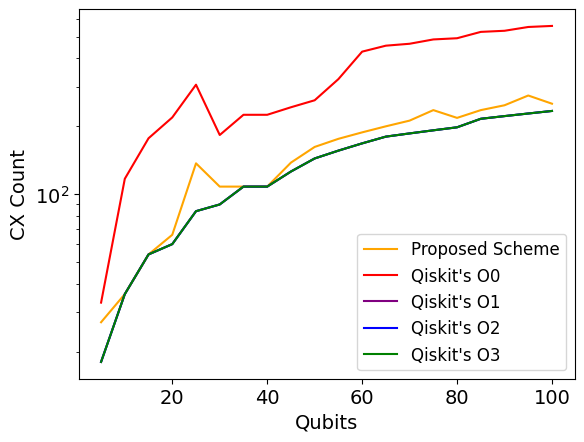

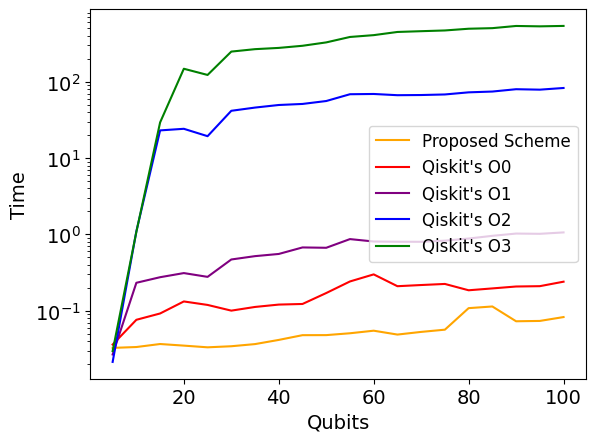

In [21]:
for considered_following_qubits in [1]:

    for sample_probability in [0.4]:
        print(considered_following_qubits, sample_probability)
        df_new = df[(df.sample_probability==sample_probability) & (df.considered_following_qubits==considered_following_qubits)]

        ax1 = df_new.plot(x='num_qubits2', y='cx_count_proposed', color='orange', label="Proposed Scheme")   
        ax1.tick_params(which='both', labelsize=size)
        ax3 = df_new.plot( x='num_qubits2', y='cx_count_O0', color='red', ax=ax1, label="Qiskit's O0")
        ax4 = df_new.plot( x='num_qubits2', y='cx_count_O1', color='purple', ax=ax1, label="Qiskit's O1") 
        ax5 = df_new.plot( x='num_qubits2', y='cx_count_O2', color='blue', ax=ax1, label="Qiskit's O2") 
        ax6 = df_new.plot( x='num_qubits2', y='cx_count_O3', color='green', ax=ax1, label="Qiskit's O3") 


        plt.xlabel("Qubits", size=size)
        plt.ylabel("CX Count", size=size)
        #plt.xscale("log")
        plt.yscale("log")
        plt.legend(fontsize=legendsize)
        plt.savefig('sat_cx_'+ str(sample_probability)+'.pdf')
        plt.show()

        ax5 = df_new.plot( x='num_qubits2', y='time_proposed', color='orange', label="Proposed Scheme")   
        ax5.tick_params(which='both', labelsize=size)
        ax7 = df_new.plot(x='num_qubits2', y='time_baseline_O0', color='red', ax=ax5, label="Qiskit's O0")
        ax8 = df_new.plot(x='num_qubits2', y='time_baseline_O1', color='purple', ax=ax5, label="Qiskit's O1") 
        ax9 = df_new.plot( x='num_qubits2', y='time_baseline_O2', color='blue', ax=ax5, label="Qiskit's O2") 
        ax10 = df_new.plot( x='num_qubits2', y='time_baseline_O3', color='green', ax=ax5, label="Qiskit's O3") 

        plt.xlabel("Qubits", size=size)
        plt.ylabel("Time", size=size)
        #plt.xscale("log")
        plt.yscale("log")
        plt.legend(fontsize=legendsize, loc="center right")
        plt.savefig('sat_time_' + str(sample_probability)+'.pdf')
        plt.show()


In [22]:
df["order_magnitudes_diff"] = df["time_proposed"].apply(orderOfMagnitude)-df["time_baseline_O3"].apply(orderOfMagnitude)
df["order_magnitudes_diff"].describe()

count    20.000000
mean     -3.550000
std       0.998683
min      -4.000000
25%      -4.000000
50%      -4.000000
75%      -3.750000
max       0.000000
Name: order_magnitudes_diff, dtype: float64